In [1]:
import pandas as pd

# Load dataset
file_path = "UBER.csv"
df = pd.read_csv(file_path)

# Display basic info and first few rows
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       725 non-null    object 
 1   Open       725 non-null    float64
 2   High       725 non-null    float64
 3   Low        725 non-null    float64
 4   Close      725 non-null    float64
 5   Adj Close  725 non-null    float64
 6   Volume     725 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 39.8+ KB


(None,
          Date       Open       High        Low      Close  Adj Close  \
 0  2019-05-10  42.000000  45.000000  41.060001  41.570000  41.570000   
 1  2019-05-13  38.790001  39.240002  36.080002  37.099998  37.099998   
 2  2019-05-14  38.310001  39.959999  36.849998  39.959999  39.959999   
 3  2019-05-15  39.369999  41.880001  38.950001  41.290001  41.290001   
 4  2019-05-16  41.480000  44.060001  41.250000  43.000000  43.000000   
 
       Volume  
 0  186322500  
 1   79442400  
 2   46661100  
 3   36086100  
 4   38115500  )

In [2]:
df["Date"] = pd.to_datetime(df["Date"])


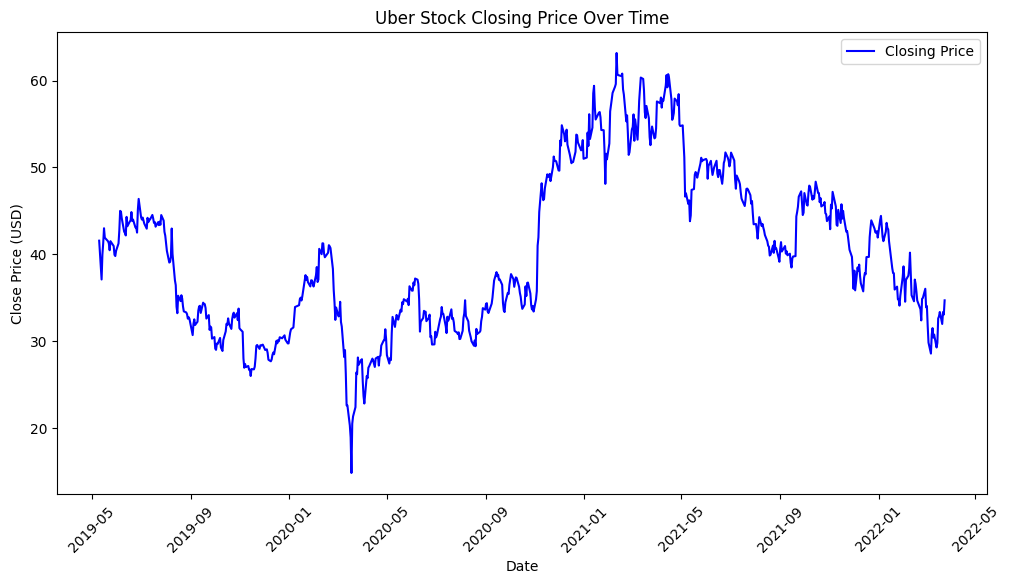

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["Close"], label="Closing Price", color="b")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.title("Uber Stock Closing Price Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.show()


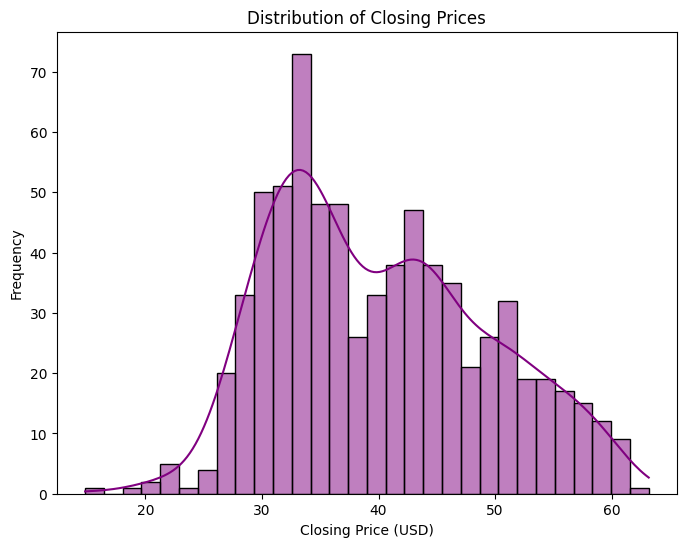

In [4]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(df["Close"], bins=30, kde=True, color="purple")
plt.xlabel("Closing Price (USD)")
plt.ylabel("Frequency")
plt.title("Distribution of Closing Prices")
plt.show()


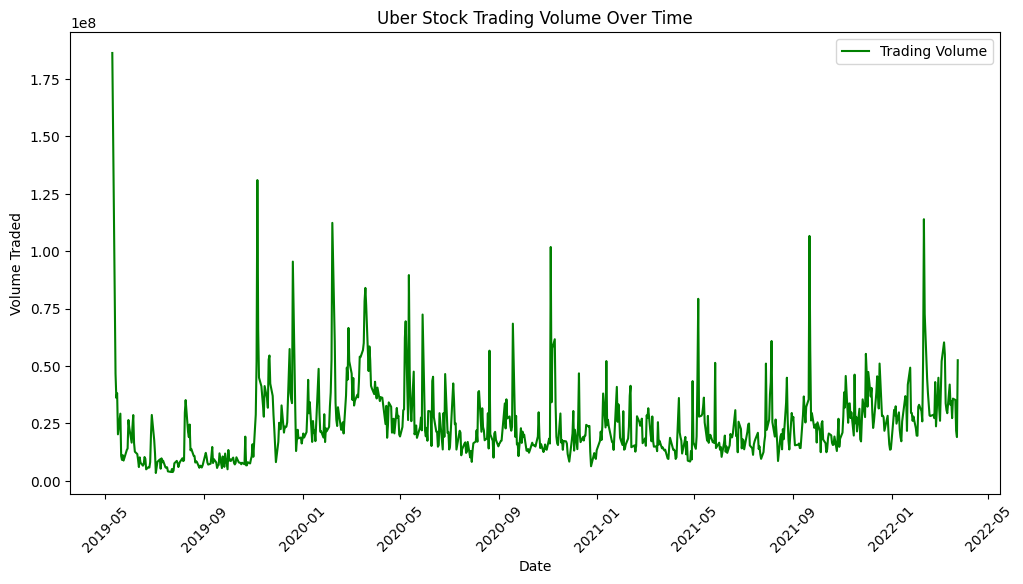

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["Volume"], label="Trading Volume", color="g")
plt.xlabel("Date")
plt.ylabel("Volume Traded")
plt.title("Uber Stock Trading Volume Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.show()


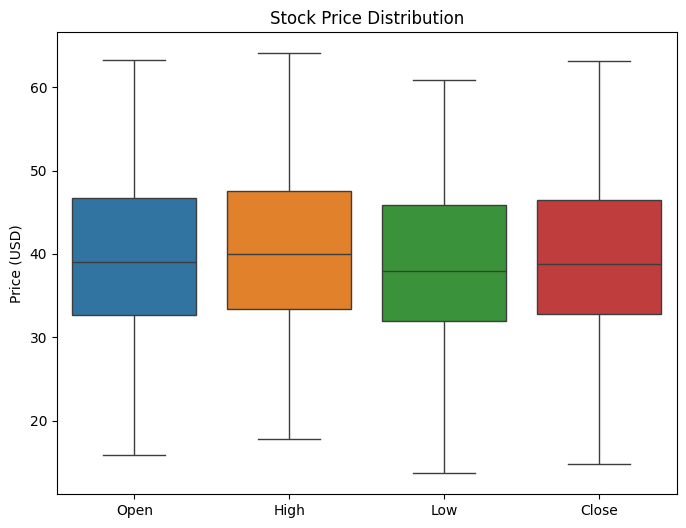

In [6]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[["Open", "High", "Low", "Close"]])
plt.ylabel("Price (USD)")
plt.title("Stock Price Distribution")
plt.show()


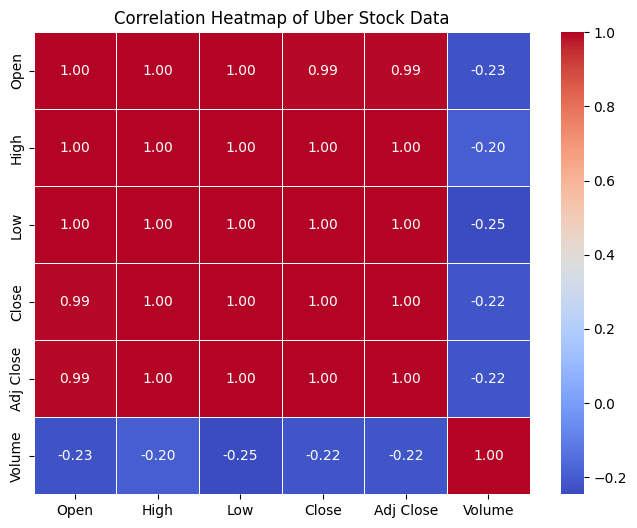

In [7]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Uber Stock Data")
plt.show()


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Select features and target
X = df[['Open']]
y = df['Close']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict values
y_pred = lr_model.predict(X_test)


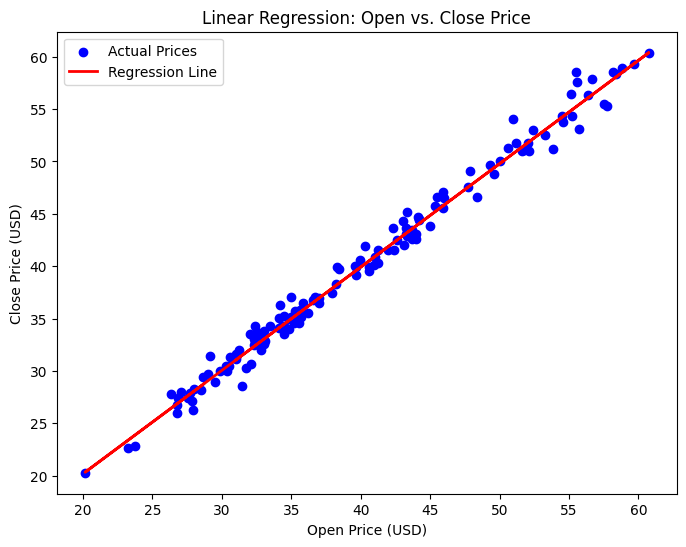

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label="Actual Prices")
plt.plot(X_test, y_pred, color='red', linewidth=2, label="Regression Line")
plt.xlabel("Open Price (USD)")
plt.ylabel("Close Price (USD)")
plt.title("Linear Regression: Open vs. Close Price")
plt.legend()
plt.show()


In [10]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Compute metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

r2, mse, mae


(0.9881030637894037, 1.0316743480837156, 0.7634841942058483)

Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Create binary target (Above/Below median Close Price)
median_close = df["Close"].median()
df["Close_Category"] = (df["Close"] > median_close).astype(int)

# Define new target variable
y_logistic = df["Close_Category"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_logistic, test_size=0.2, random_state=42)

# Train Logistic Regression model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Predict values
y_pred_log = log_model.predict(X_test)


Confusion Matrix

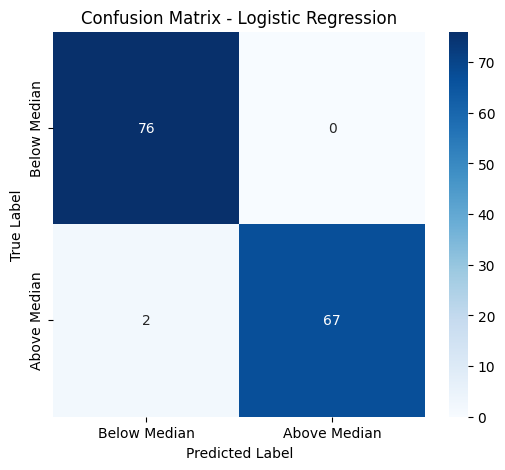

In [12]:
conf_matrix = confusion_matrix(y_test, y_pred_log)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Below Median", "Above Median"], yticklabels=["Below Median", "Above Median"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [13]:
class_report = classification_report(y_test, y_pred_log)
print(class_report)


              precision    recall  f1-score   support

           0       0.97      1.00      0.99        76
           1       1.00      0.97      0.99        69

    accuracy                           0.99       145
   macro avg       0.99      0.99      0.99       145
weighted avg       0.99      0.99      0.99       145



K Neighbors Classifier

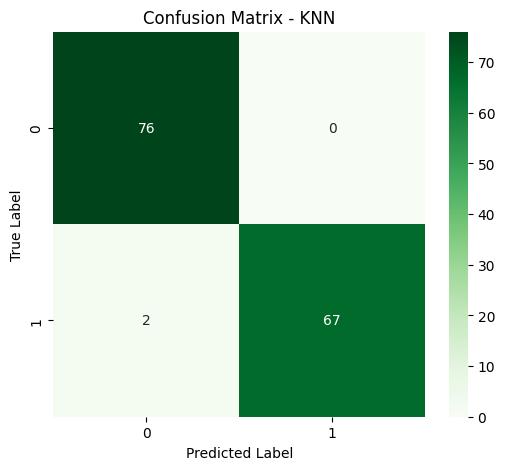

In [14]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predict values
y_pred_knn = knn_model.predict(X_test)

# Confusion Matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - KNN")
plt.show()


Decision Tree Classifier

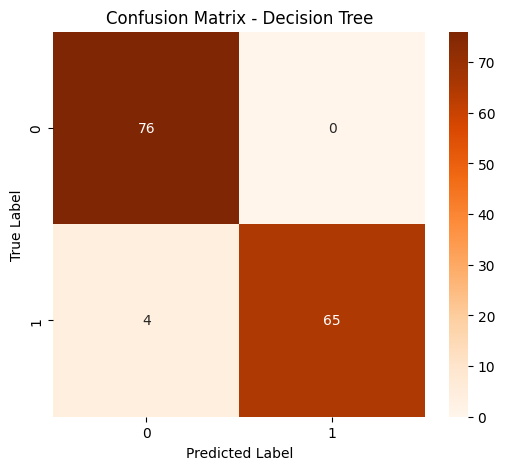

In [15]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict values
y_pred_dt = dt_model.predict(X_test)

# Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Oranges")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Decision Tree")
plt.show()


Random Forest Regression

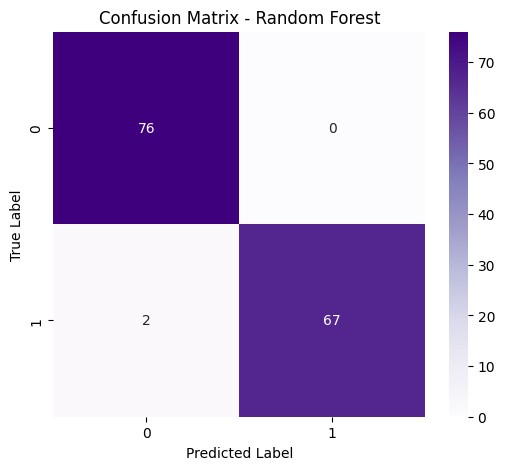

In [16]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict values
y_pred_rf = rf_model.predict(X_test)

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Purples")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest")
plt.show()


Support Vector Machine

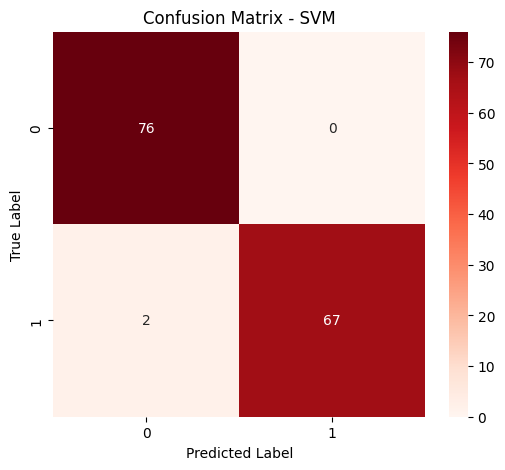

In [17]:
from sklearn.svm import SVC

# Train SVM model
svm_model = SVC(kernel="linear")
svm_model.fit(X_train, y_train)

# Predict values
y_pred_svm = svm_model.predict(X_test)

# Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Reds")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - SVM")
plt.show()


In [18]:
r2, mse, mae


(0.9881030637894037, 1.0316743480837156, 0.7634841942058483)